# Librerias

In [56]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers, Input
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [57]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [58]:
word_index = imdb.get_word_index()

In [59]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [60]:
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [61]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [62]:
X_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [63]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [64]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [68]:
history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7004 - loss: 0.6078 - val_accuracy: 0.8483 - val_loss: 0.4300
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8888 - loss: 0.3696 - val_accuracy: 0.8785 - val_loss: 0.3340
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9184 - loss: 0.2701 - val_accuracy: 0.8866 - val_loss: 0.2926
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9312 - loss: 0.2152 - val_accuracy: 0.8827 - val_loss: 0.2849
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9410 - loss: 0.1845 - val_accuracy: 0.8869 - val_loss: 0.2754
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9490 - loss: 0.1558 - val_accuracy: 0.8741 - val_loss: 0.3095
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9582 - loss: 0.1342 - val_accuracy: 0.8839 - val_loss: 0.2965
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9644 - loss: 0.1168 - val_accuracy: 0.8781 - val_loss

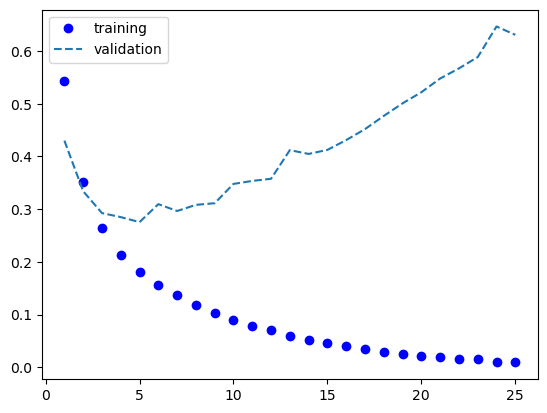

In [69]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

MALDITO OVERFITING!!!!!!

# Reduciendo el overfitting

## Reducir el modelo

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6464 - loss: 0.6703 - val_accuracy: 0.8271 - val_loss: 0.5905
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8527 - loss: 0.5603 - val_accuracy: 0.8503 - val_loss: 0.5041
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.4668 - val_accuracy: 0.8588 - val_loss: 0.4355
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8891 - loss: 0.3965 - val_accuracy: 0.8718 - val_loss: 0.3834
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9058 - loss: 0.3342 - val_accuracy: 0.8791 - val_loss: 0.3470
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9149 - loss: 0.2921 - val_accuracy: 0.8835 - val_loss: 0.3219
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9231 - loss: 0.2558 - val_accuracy: 0.8848 - val_loss: 0.3005
Epoch 8/25
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9291 - loss: 0.2275

2024-07-20 02:26:07.188514: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 20482048 bytes after encountering the first element of size 20482048 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9293 - loss: 0.2265 - val_accuracy: 0.8868 - val_loss: 0.2894
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9347 - loss: 0.2068 - val_accuracy: 0.8895 - val_loss: 0.2787
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9424 - loss: 0.1819 - val_accuracy: 0.8895 - val_loss: 0.2751
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9461 - loss: 0.1696 - val_accuracy: 0.8908 - val_loss: 0.2732
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9513 - loss: 0.1566 - val_accuracy: 0.8892 - val_loss: 0.2746
Epoch 13/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9543 - loss: 0.1450 - val_accuracy: 0.8887 - val_loss: 0.2765
Epoch 14/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9605 - loss: 0.1310 - val_accuracy: 0.8873 - val_loss: 0.2807
Epoch 15/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9647 - loss: 0.1199 - val_accuracy: 0.8880 - val_loss: 0.2

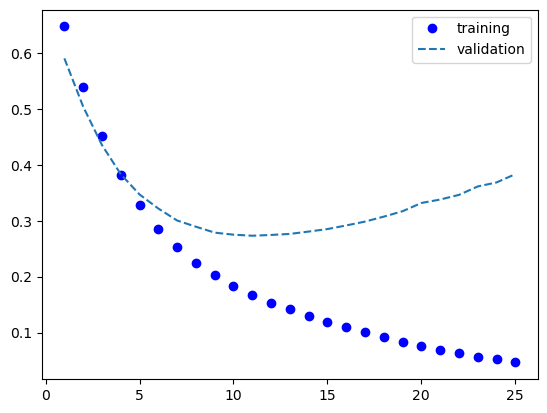

In [73]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

## Regularizacion

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6226 - loss: 1.1494 - val_accuracy: 0.8179 - val_loss: 0.6947
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8259 - loss: 0.6603 - val_accuracy: 0.8318 - val_loss: 0.6225
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8491 - loss: 0.5948 - val_accuracy: 0.8490 - val_loss: 0.5755
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8627 - loss: 0.5517 - val_accuracy: 0.8443 - val_loss: 0.5596
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8618 - loss: 0.5288 - val_accuracy: 0.8535 - val_loss: 0.5296
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8662 - loss: 0.5067 - val_accuracy: 0.8595 - val_loss: 0.5148
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8637 - loss: 0.4991 - val_accuracy: 0.8629 - val_loss: 0.5005
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8655 - loss: 0.4885 - val_accuracy: 0.8633 - val_los

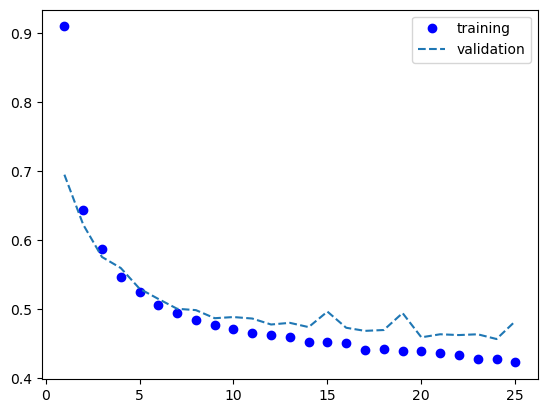

In [76]:
from keras import regularizers

model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

parece bueno pero en realidad tambien es un mojon

## Dropout

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5996 - loss: 0.6591 - val_accuracy: 0.8275 - val_loss: 0.5235
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7623 - loss: 0.5429 - val_accuracy: 0.8657 - val_loss: 0.4464
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8297 - loss: 0.4687 - val_accuracy: 0.8768 - val_loss: 0.3863
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8634 - loss: 0.4054 - val_accuracy: 0.8813 - val_loss: 0.3442
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8776 - loss: 0.3669 - val_accuracy: 0.8837 - val_loss: 0.3278
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8964 - loss: 0.3287 - val_accuracy: 0.8843 - val_loss: 0.3156
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9131 - loss: 0.2898 - val_accuracy: 0.8845 - val_loss: 0.2922
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9183 - loss: 0.2626 - val_accuracy: 0.8829 - val_lo

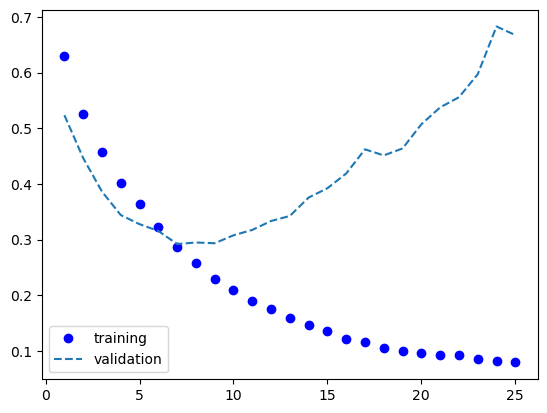

In [77]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

## El mio

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5161 - loss: 0.7558 - val_accuracy: 0.6525 - val_loss: 0.6984
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5881 - loss: 0.6916 - val_accuracy: 0.8343 - val_loss: 0.6589
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6193 - loss: 0.6631 - val_accuracy: 0.8473 - val_loss: 0.6381
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6384 - loss: 0.6473 - val_accuracy: 0.8465 - val_loss: 0.6235
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6429 - loss: 0.6409 - val_accuracy: 0.8505 - val_loss: 0.6127
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6584 - loss: 0.6286 - val_accuracy: 0.8591 - val_loss: 0.5976
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6723 - loss: 0.6197 - val_accuracy: 0.8577 - val_loss: 0.5878
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6846 - loss: 0.6080 - val_accuracy: 0.8607 - val_l

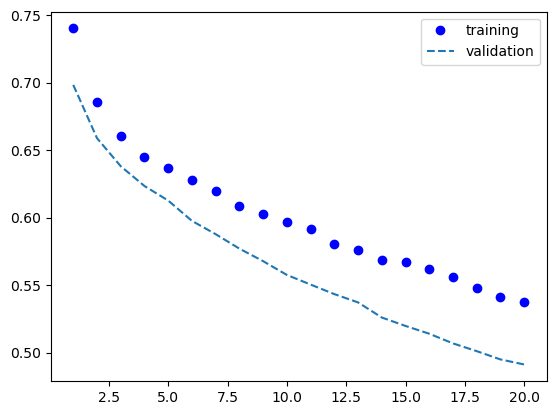

In [85]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()